<a href="https://colab.research.google.com/github/jeffkayser2/deep-learning-with-python-notebooks/blob/master/DL_Book_Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255



In [7]:
train_images_with_noise_channels =  np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model



In [9]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zero_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7024 - loss: 1.0128 - val_accuracy: 0.9154 - val_loss: 0.2783
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9122 - loss: 0.2859 - val_accuracy: 0.9389 - val_loss: 0.1995
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9469 - loss: 0.1706 - val_accuracy: 0.9556 - val_loss: 0.1480
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9604 - loss: 0.1236 - val_accuracy: 0.9597 - val_loss: 0.1390
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9497 - val_loss: 0.1668
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9797 - loss: 0.0644 - val_accuracy: 0.9603 - val_loss: 0.1315
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9673 - val_loss: 0.1198
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9896 - loss: 0.0330 - val_a

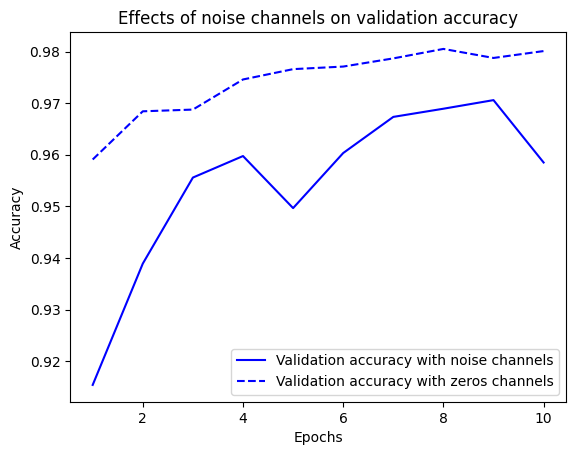

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
        label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
        label="Validation accuracy with zeros channels")
plt.title("Effects of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)



Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1044 - loss: 2.3318 - val_accuracy: 0.0961 - val_loss: 2.3076
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1198 - loss: 2.2965 - val_accuracy: 0.1037 - val_loss: 2.3132
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1279 - loss: 2.2895 - val_accuracy: 0.1032 - val_loss: 2.3174
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1381 - loss: 2.2770 - val_accuracy: 0.0990 - val_loss: 2.3249
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1557 - loss: 2.2605 - val_accuracy: 0.1026 - val_loss: 2.3353
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1739 - loss: 2.2365 - val_accuracy: 0.1021 - val_loss: 2.3503
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1868 - loss: 2.2158 - val_accuracy: 0.1004 - val_loss: 2.3639
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2061 - loss: 2.1837 - 

In [14]:
(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8368 - loss: 0.8184 - val_accuracy: 0.9572 - val_loss: 0.1444
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9630 - loss: 0.1283 - val_accuracy: 0.9675 - val_loss: 0.1251
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9743 - loss: 0.0929 - val_accuracy: 0.9699 - val_loss: 0.1347
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9797 - loss: 0.0714 - val_accuracy: 0.9692 - val_loss: 0.1536
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9836 - loss: 0.0602 - val_accuracy: 0.9693 - val_loss: 0.1839
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9854 - loss: 0.0543 - val_accuracy: 0.9731 - val_loss: 0.1871
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9885 - loss: 0.0431 - val_accuracy: 0.9721 - val_loss: 0.1829
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9897 - loss: 0.0413 - val_accu

In [15]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7422 - loss: 1.0235 - val_accuracy: 0.9006 - val_loss: 0.3613
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8997 - loss: 0.3685 - val_accuracy: 0.9148 - val_loss: 0.3101
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9110 - loss: 0.3232 - val_accuracy: 0.9169 - val_loss: 0.2947
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.3022 - val_accuracy: 0.9209 - val_loss: 0.2843
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9174 - loss: 0.2936 - val_accuracy: 0.9219 - val_loss: 0.2782
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9198 - loss: 0.2817 - val_accuracy: 0.9243 - val_loss: 0.2755
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9201 - loss: 0.2849 - val_accuracy: 0.9249 - val_loss: 0.2713
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.2755 - val_accuracy: 0.

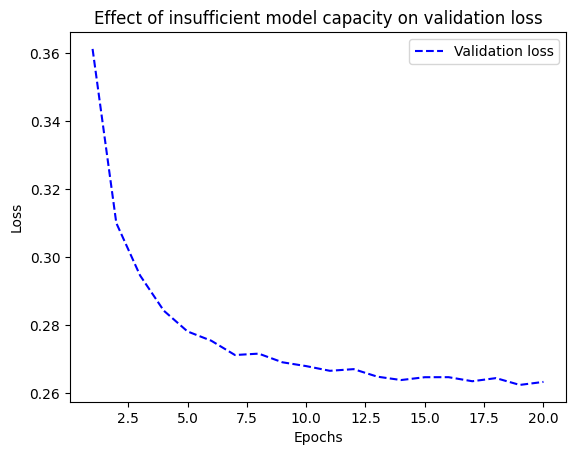

In [16]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8264 - loss: 0.6218 - val_accuracy: 0.9462 - val_loss: 0.1902
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9489 - loss: 0.1736 - val_accuracy: 0.9614 - val_loss: 0.1313
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9654 - loss: 0.1166 - val_accuracy: 0.9625 - val_loss: 0.1237
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9734 - loss: 0.0875 - val_accuracy: 0.9703 - val_loss: 0.1010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9798 - loss: 0.0676 - val_accuracy: 0.9699 - val_loss: 0.1022
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9824 - loss: 0.0569 - val_accuracy: 0.9708 - val_loss: 0.1039
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0479 - val_accuracy: 0.9715 - val_loss: 0.0992
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.

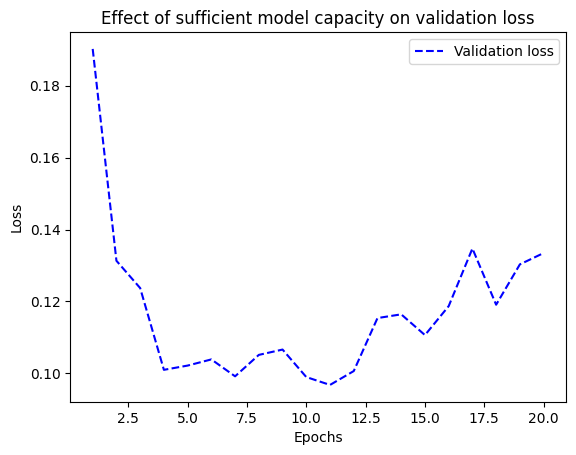

In [18]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [28]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import regularizers

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16,
                 #kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 #kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6946 - loss: 0.5964 - val_accuracy: 0.8738 - val_loss: 0.3903
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8986 - loss: 0.3331 - val_accuracy: 0.8704 - val_loss: 0.3328
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9234 - loss: 0.2416 - val_accuracy: 0.8876 - val_loss: 0.2846
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9447 - loss: 0.1843 - val_accuracy: 0.8897 - val_loss: 0.2798
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9540 - loss: 0.1505 - val_accuracy: 0.8888 - val_loss: 0.2797
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9609 - loss: 0.1280 - val_accuracy: 0.8857 - val_loss: 0.2900
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9735 - loss: 0.1007 - val_accuracy: 0.8746 - val_loss: 0.3338
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9761 - loss: 0.0895 - val_accuracy: 0.8812 - v

In [35]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5567 - loss: 0.6751 - val_accuracy: 0.8115 - val_loss: 0.5658
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7422 - loss: 0.5629 - val_accuracy: 0.8658 - val_loss: 0.4619
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8000 - loss: 0.4823 - val_accuracy: 0.8769 - val_loss: 0.3882
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8457 - loss: 0.4148 - val_accuracy: 0.8804 - val_loss: 0.3428
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8696 - loss: 0.3553 - val_accuracy: 0.8838 - val_loss: 0.3034
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8805 - loss: 0.3206 - val_accuracy: 0.8876 - val_loss: 0.2877
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9072 - loss: 0.2777 - val_accuracy: 0.8883 - val_loss: 0.2790
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9190 - loss: 0.2546 - val_accuracy: 0.8900 - v

In [33]:

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7157 - loss: 0.7039 - val_accuracy: 0.8624 - val_loss: 0.5108
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8853 - loss: 0.4630 - val_accuracy: 0.8645 - val_loss: 0.4334
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9037 - loss: 0.3690 - val_accuracy: 0.8853 - val_loss: 0.3793
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9195 - loss: 0.3203 - val_accuracy: 0.8826 - val_loss: 0.3722
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9317 - loss: 0.2905 - val_accuracy: 0.8860 - val_loss: 0.3602
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9369 - loss: 0.2762 - val_accuracy: 0.8862 - val_loss: 0.3604
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9427 - loss: 0.2587 - val_accuracy: 0.8835 - val_loss: 0.3664
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9493 - loss: 0.2439 - val_accuracy: 0.8817 - v

In [20]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6292 - loss: 0.6610 - val_accuracy: 0.7324 - val_loss: 0.5856
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7789 - loss: 0.5681 - val_accuracy: 0.7687 - val_loss: 0.5408
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8335 - loss: 0.5158 - val_accuracy: 0.8451 - val_loss: 0.5099
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8694 - loss: 0.4758 - val_accuracy: 0.7878 - val_loss: 0.4996
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8766 - loss: 0.4518 - val_accuracy: 0.8510 - val_loss: 0.4732
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9048 - loss: 0.4323 - val_accuracy: 0.8285 - val_loss: 0.4703
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9121 - loss: 0.4116 - val_accuracy: 0.8615 - val_loss: 0.4517
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9242 - loss: 0.3944 - val_accuracy: 0.8482 - v

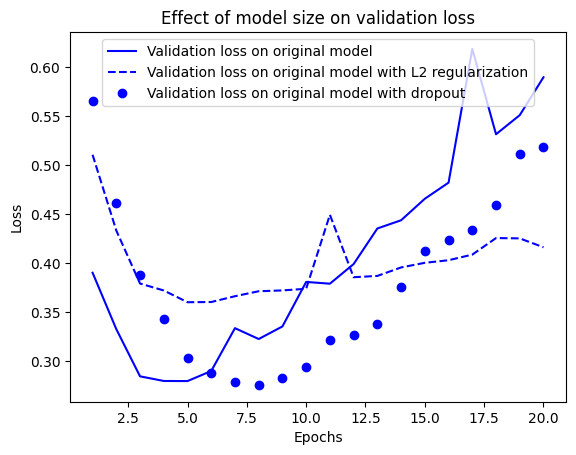

In [37]:
import matplotlib.pyplot as plt

val_original_loss = history_original.history["val_loss"]
val_l2_reg = history_l2_reg.history["val_loss"]
val_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original_loss, "b-",
         label="Validation loss on original model")
plt.plot(epochs, val_l2_reg, "b--",
         label="Validation loss on original model with L2 regularization")
plt.plot(epochs, val_dropout, "bo",
         label="Validation loss on original model with dropout")
plt.title("Effect of model size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_larger_model = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.6532 - loss: 0.6429 - val_accuracy: 0.8665 - val_loss: 0.3403
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.8599 - loss: 0.3433 - val_accuracy: 0.8828 - val_loss: 0.2800
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - accuracy: 0.9122 - loss: 0.2279 - val_accuracy: 0.8886 - val_loss: 0.2674
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.9339 - loss: 0.1716 - val_accuracy: 0.8883 - val_loss: 0.2751
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - accuracy: 0.9537 - loss: 0.1305 - val_accuracy: 0.8871 - val_loss: 0.2814
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.9786 - loss: 0.0726 - val_accuracy: 0.8137 - val_loss: 0.5922
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - accuracy: 0.9636 - loss: 0.0909 - val_accuracy: 0.8831 - val_loss: 0.3290
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.9929 - loss: 0.0329 - val_accur

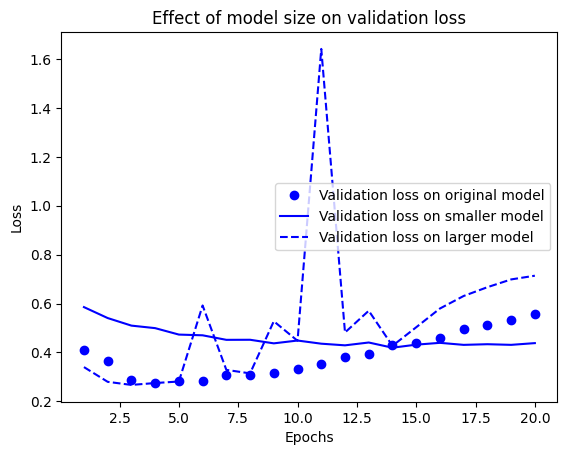

In [24]:
import matplotlib.pyplot as plt

val_original_loss = history_original.history["val_loss"]
val_smaller_loss = history_smaller_model.history["val_loss"]
val_larger_loss = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_original_loss, "bo",
         label="Validation loss on original model")
plt.plot(epochs, val_smaller_loss, "b-",
         label="Validation loss on smaller model")
plt.plot(epochs, val_larger_loss, "b--",
         label="Validation loss on larger model")
plt.title("Effect of model size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()